In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scraping_class
from matplotlib.dates import DateFormatter
import seaborn as sns
from bs4 import BeautifulSoup

In [2]:
plt.style.use('ggplot')
%matplotlib inline

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [291]:
nom = pd.read_csv('oscar_nominees.csv', index_col = 'index')
win = pd.read_csv('oscar_winners.csv' , index_col = 'index')

In [292]:
nom = nom.drop(columns = 'Unnamed: 0')
win = win.drop(columns = 'Unnamed: 0')

In [293]:
nom = nom.assign(won_oscar = lambda nom: nom.title.isin(win.title))

In [321]:
genres = []
row = 1

for i in nom.genre:
    split_1 = i.strip('[ ]')
    split_2 = split_1.split(',')
    
    for j in split_2:
        genre = j.strip("' '")
        
        nom[genre][row] = 1
        #if genre not in genres:
        #    genres.append(genre)
    row += 1
        

c:\users\bijan taheri\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [320]:
for genre in genres:
    nom[genre] = 0

In [328]:
nom.fillna(np.nan, inplace = True)

In [355]:
logfile = pd.read_csv('.csv', sep=";", names=['id','project','connector_type','t','delta_t','url','redirect_url','response_size','response_code','success','error'])

In [356]:
logfile.head()

,id,project,connector_type,t,delta_t,url,redirect_url,response_size,response_code,success,error
0,4,awards,requests,1.566586e+09,-0.312296,https://www.imdb.com//name/nm1724319/awards,https://www.imdb.com//name/nm1724319/awards,76195,200,True,NaN
1,5,awards,requests,1.566586e+09,-0.658835,https://www.imdb.com//name/nm0868219/awards,https://www.imdb.com//name/nm0868219/awards,201005,200,True,NaN
2,6,awards,requests,1.566586e+09,-0.832530,https://www.imdb.com//name/nm1020089/awards,https://www.imdb.com//name/nm1020089/awards,160675,200,True,NaN
3,7,awards,requests,1.566586e+09,-0.426235,https://www.imdb.com//name/nm0818055/awards,https://www.imdb.com//name/nm0818055/awards,144616,200,True,NaN
4,8,awards,requests,1.566586e+09,-0.409202,https://www.imdb.com//name/nm0788335/awards,https://www.imdb.com//name/nm0788335/awards,154067,200,True,NaN


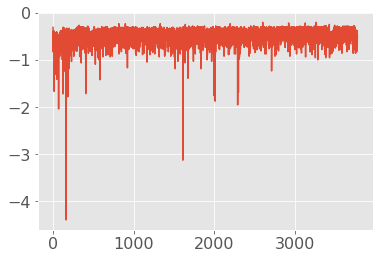

In [357]:
logfile.delta_t.plot()